# Preparação de um Modelo de Velocidades

Prepara um modelo a partir do modelo original Overthrust.

## True Model

Para obter os dados (repositório do M. Loubutin):

overthrust_3D_initial_model.h5:
$ wget ftp://slim.gatech.edu/data/SoftwareRelease/WaveformInversion.jl/3DFWI/overthrust_3D_initial_model.h5

overthrust_3D_true_model.h5:
$ wget ftp://slim.gatech.edu/data/SoftwareRelease/WaveformInversion.jl/3DFWI/overthrust_3D_true_model.h5\


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_velocity_model(model, file_name="velocity_model",
                        colorbar=True, cmap="jet", show=False):

    # create the destination dir
    os.makedirs("plots", exist_ok=True)

    # process data and generate the plot
    plot = plt.imshow(model, cmap=cmap)

    # Create aligned colorbar on the right
    if colorbar:
        ax = plt.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(plot, cax=cax)

    plt.savefig("plots/{}.png".format(file_name), format="png")

    if show:
        plt.show()

    plt.close()

    print("Velocity model saved in plots/{}.png".format(file_name))
   
# Recorta o modelo original de acordo com as coordenadas
def cut_model(data, z1, z2, x1, x2, y1, y2):
    
    new_data = data[z1:z2,x1:x2,y1:y2]
    
    return new_data

Lê o modelo original, exibe as dimensões nos 3 eixos e produz slices do modelo original nas 3 dimensões (aproximadamente no ponto médio de cada eixo).


Keys: <KeysViewHDF5 ['copyright', 'd', 'm', 'n', 'o']>
(207, 801, 801)


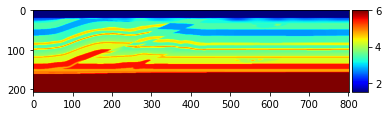

Velocity model saved in plots/slice_true_dim3.png


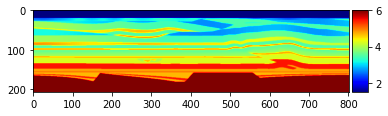

Velocity model saved in plots/slice_true_dim2.png


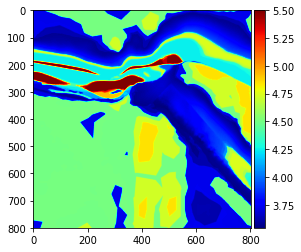

Velocity model saved in plots/slice_true_dim1.png


In [2]:
filename = "overthrust_3D_true_model.h5"
#filename = "overthrust_3D_initial_model.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    # Get the data
    data = list(f['m'])
    data = np.array(data)
    # convert to m/s
    #data = (1 / (data ** (1 / 2))) * 1000.0
    data = (1 / (data ** (1 / 2)))

print(data.shape)

plot_velocity_model (data[:,:,500], file_name="slice_true_dim3",show=True)
plot_velocity_model (data[:,400,:], file_name="slice_true_dim2",show=True)
plot_velocity_model (data[100,:,:], file_name="slice_true_dim1",show=True)

Faz o recorte do modelo original, gerando um novo modelo menor.

In [3]:
infilename = "overthrust_3D_true_model.h5"
outfilename = "reduced_overthrust_3D_true_model.h5"

with h5py.File(infilename, 'r') as infile:
    data_m = infile['m'][()]
    m_reduced = cut_model(data_m,0,201,50,451,500,801)
    data_o = infile['o'][()]
    data_d = infile['d'][()]
    #data_copytight = infile['copyright'][()]
    o_reduced = data_o
    d_reduced = data_d

    with h5py.File(outfilename, 'w') as outfile:
        outfile.create_dataset('m', data=m_reduced)
        outfile.create_dataset('o', data=o_reduced)
        outfile.create_dataset('d', data=d_reduced)



Exibe slices do "true model" reduzido.


Keys: <KeysViewHDF5 ['d', 'm', 'o']>
(201, 401, 301)


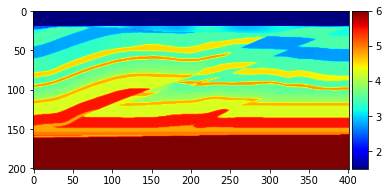

Velocity model saved in plots/slice_dim3_true_reduzido.png


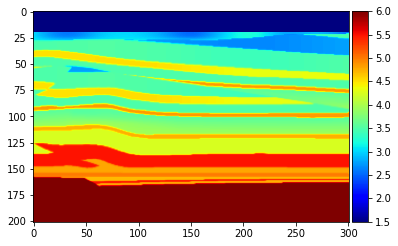

Velocity model saved in plots/slice_dim2_true_reduzido.png


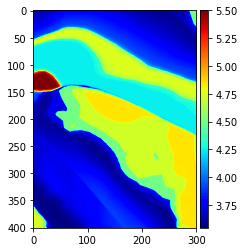

Velocity model saved in plots/slice_dim1_true_reduzido.png


In [4]:
filename = "reduced_overthrust_3D_true_model.h5"

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    data = list(f['m'])
    data = np.array(data)
    data = (1 / (data ** (1 / 2)))

print(data.shape)

plot_velocity_model (data[:,:,0], file_name="slice_dim3_true_reduzido",show=True)
plot_velocity_model (data[:,250,:], file_name="slice_dim2_true_reduzido",show=True)
plot_velocity_model (data[100,:,:], file_name="slice_dim1_true_reduzido",show=True)

## Recorta modelo inicial

Lê o modelo incial e gera slices.

Keys: <KeysViewHDF5 ['copyright', 'd', 'm0', 'n', 'o']>
(207, 801, 801)


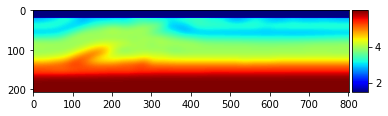

Velocity model saved in plots/slice_initial_dim3.png


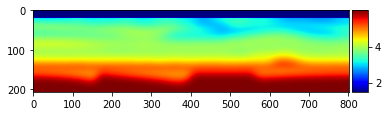

Velocity model saved in plots/slice_initial_dim2.png


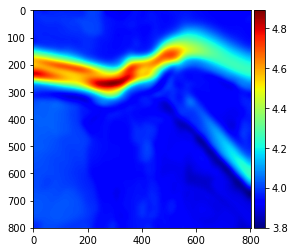

Velocity model saved in plots/slice_initial_dim1.png


In [5]:
filename = "overthrust_3D_initial_model.h5"

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    data = list(f['m0'])
    data = np.array(data)
    data = (1 / (data ** (1 / 2)))

print(data.shape)

plot_velocity_model (data[:,:,500], file_name="slice_initial_dim3",show=True)
plot_velocity_model (data[:,400,:], file_name="slice_initial_dim2",show=True)
plot_velocity_model (data[100,:,:], file_name="slice_initial_dim1",show=True)

Reduz o modelo inicial.

In [6]:
infilename = "overthrust_3D_initial_model.h5"
outfilename = "reduced_overthrust_3D_initial_model.h5"

with h5py.File(infilename, 'r') as infile:
    data_m = infile['m0'][()]
    m_reduced = cut_model(data_m,0,201,50,451,500,801)
    data_o = infile['o'][()]
    data_d = infile['d'][()]
    #data_copytight = infile['copyright'][()]
    o_reduced = data_o
    d_reduced = data_d

    with h5py.File(outfilename, 'w') as outfile:
        outfile.create_dataset('m0', data=m_reduced)
        outfile.create_dataset('o', data=o_reduced)
        outfile.create_dataset('d', data=d_reduced)


Gera slices do modelo inicial reduzido.

Keys: <KeysViewHDF5 ['d', 'm0', 'o']>
(201, 401, 301)


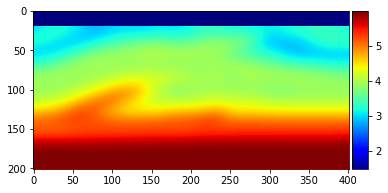

Velocity model saved in plots/slice_dim3_initial_reduzido.png


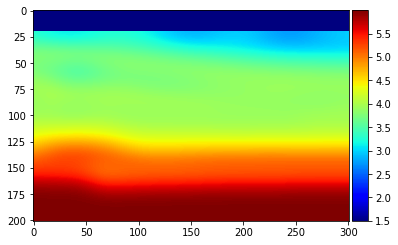

Velocity model saved in plots/slice_dim2_initial_reduzido.png


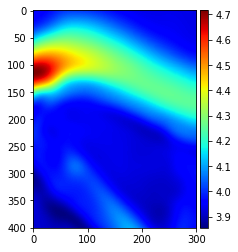

Velocity model saved in plots/slice_dim1_initial_reduzido.png


In [7]:
filename = "reduced_overthrust_3D_initial_model.h5"

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    data = list(f['m0'])
    data = np.array(data)
    data = (1 / (data ** (1 / 2)))

print(data.shape)

plot_velocity_model (data[:,:,0], file_name="slice_dim3_initial_reduzido",show=True)
plot_velocity_model (data[:,250,:], file_name="slice_dim2_initial_reduzido",show=True)
plot_velocity_model (data[100,:,:], file_name="slice_dim1_initial_reduzido",show=True)